<a href="https://colab.research.google.com/github/neha702/Microgrid-analysis/blob/main/Fft_of_battery_trend_Feb_2019(28days).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip --version

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1 Feb 2019**

 02/01/2019  Time(in min) Batteries
0                       0        -3
1                       5        24
2                      10        76
3                      15        62
4                      20        56
 02/01/2019
Time(in min)    0
Batteries       0
dtype: int64


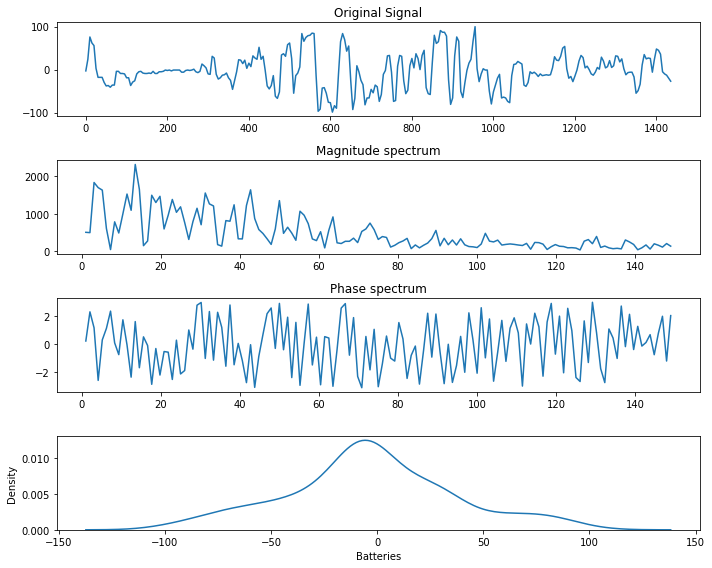

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190201.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time1=[]
for i in range(0,1437,5):
    time1.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in min)"]=pd.DataFrame(time1)
df1=df1[["Time(in min)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
import scipy as sp
import scipy.fftpack
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=np.abs(fft1) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n,1/(5*60))
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 


**2 Feb 2019**

 02/02/2019  Time(in min) Batteries
0                       0       -36
1                       5        28
2                      10        68
3                      15        52
4                      20        25
 02/02/2019
Time(in min)    0
Batteries       0
dtype: int64


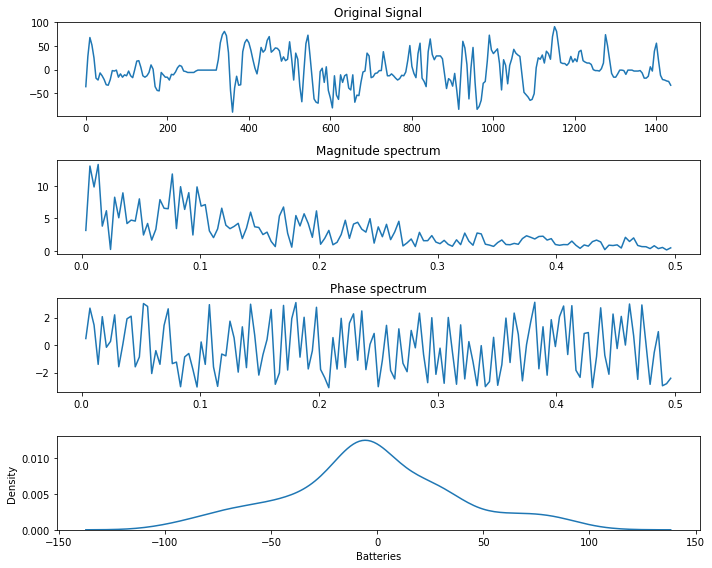

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190202.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df2=pd.DataFrame(battery_data.values[1:],columns=headers)
time2=[]
for i in range(0,1437,5):
    time2.append(i)                 #making up an array of time axis and inserting values using append
df2["Time(in min)"]=pd.DataFrame(time2)
df2=df2[["Time(in min)","Batteries"]]
print(df2.head())
print(df2.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df2["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 



In [ ]:
 pip install dtaidistance

     |████████████████████████████████| 757kB 5.8MB/s 
  Created wheel for dtaidistance: filename=dtaidistance-2.1.2-cp36-cp36m-linux_x86_64.whl size=1446281 sha256=a8eff81d56b83a6b45f51971ff78a7e60efa3021a79a20a38f6c1ff569af8e25
  Stored in directory: /root/.cache/pip/wheels/d6/2c/9e/ed7ddb5538a7f3eab7b743e657f539260c46252c330ee0180e
Successfully built dtaidistance


In [ ]:
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw
batteries1=df1["Batteries"].to_numpy()
batteries2=df2["Batteries"].to_numpy()
path = dtw.warping_path(batteries1, batteries2)
dtwvis.plot_warping(batteries1, batteries2, path, filename="batteries.png")
distance = dtw.distance(batteries1, batteries2)
print(distance)
print(path)

348.40206658399717
[(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 4), (6, 5), (6, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 11), (12, 11), (13, 11), (14, 12), (15, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 17), (20, 18), (21, 18), (22, 18), (23, 18), (24, 18), (25, 19), (26, 19), (27, 19), (28, 19), (29, 19), (30, 19), (31, 19), (32, 19), (33, 19), (34, 19), (35, 20), (36, 21), (37, 21), (38, 21), (39, 21), (40, 21), (41, 21), (42, 21), (43, 21), (44, 21), (45, 21), (46, 21), (47, 21), (48, 21), (49, 21), (50, 21), (51, 21), (52, 21), (53, 21), (54, 21), (55, 21), (56, 21), (57, 21), (58, 21), (59, 21), (60, 22), (61, 23), (61, 24), (62, 25), (63, 26), (64, 27), (64, 28), (65, 29), (66, 29), (67, 30), (68, 30), (69, 31), (69, 32), (69, 33), (70, 34), (71, 34), (72, 35), (72, 36), (73, 37), (73, 38), (73, 39), (73, 40), (73, 41), (74, 42), (74, 43), (74, 44), (74, 45), (74, 46), (74, 47), (74, 48), (74, 49), (74, 50), (74, 51), (74, 52), (74, 53), (74, 54), (74, 55), (74

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f51edb086a0>])

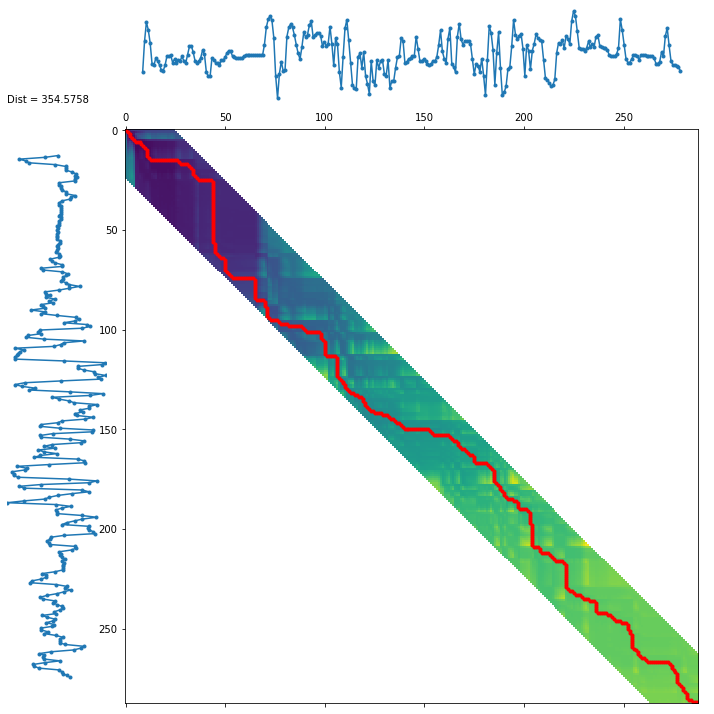

In [ ]:
d, paths = dtw.warping_paths(batteries1, batteries2, window=25)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(batteries1, batteries2, paths, best_path)

**3 Feb 2019**

 02/03/2019  Time(in min) Batteries
0                       0       -46
1                       5        -7
2                      10        -3
3                      15        -3
4                      20        -8
 02/03/2019
Time(in min)    0
Batteries       0
dtype: int64


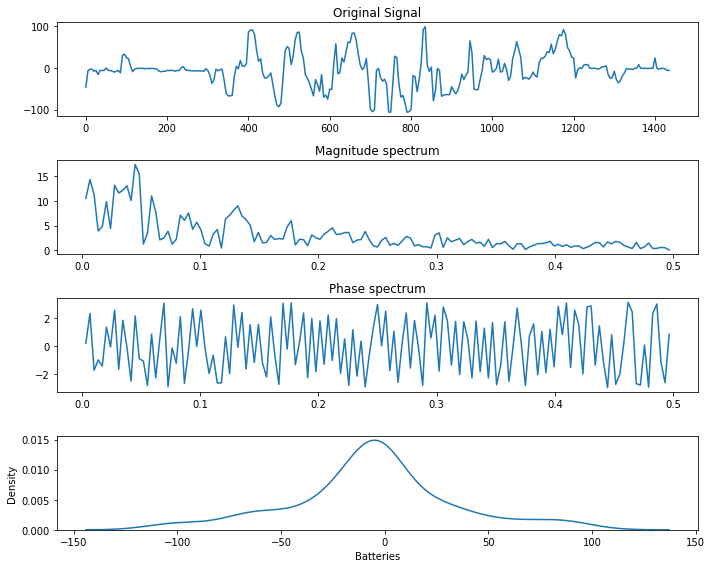

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190203.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in min)"]=pd.DataFrame(time)
df1=df1[["Time(in min)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
batteries3=df1["Batteries"].to_numpy()

**4 Feb 2019**

 02/04/2019  Time(in min) Batteries
0                       0        -4
1                       5        -3
2                      10        24
3                      15        51
4                      20        30
 02/04/2019
Time(in min)    0
Batteries       0
dtype: int64


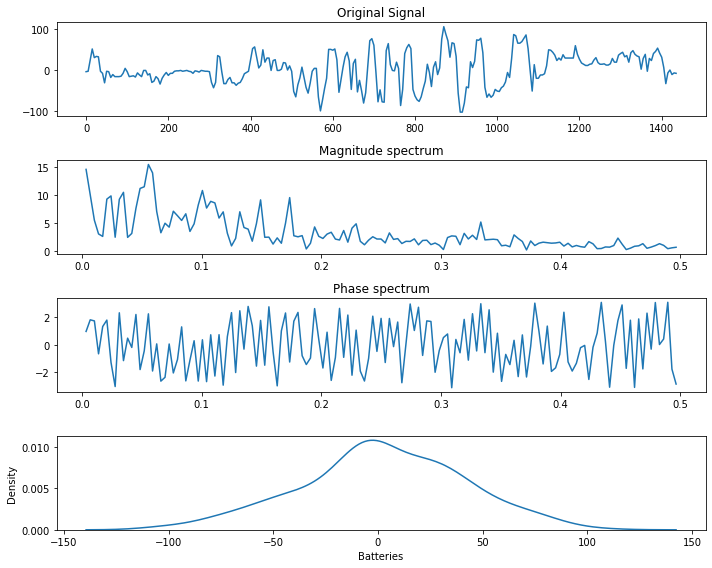

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190204.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in min)"]=pd.DataFrame(time)
df1=df1[["Time(in min)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
batteries4=df1["Batteries"].to_numpy()

**5 Feb 2019**

 02/05/2019  Time(in min) Batteries
0                       0         0
1                       5        67
2                      10        91
3                      15        60
4                      20        13
 02/05/2019
Time(in min)    0
Batteries       0
dtype: int64


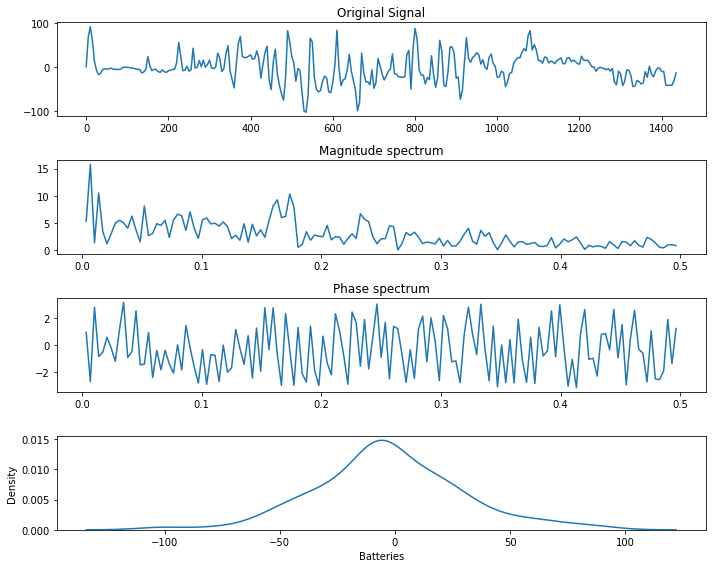

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190205.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in min)"]=pd.DataFrame(time)
df1=df1[["Time(in min)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
batteries5=df1["Batteries"].to_numpy()

In [ ]:
pip install PyClustering

     |████████████████████████████████| 2.6MB 6.1MB/s 
  Created wheel for PyClustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395106 sha256=944bb28b52d221411c54e7c4f22e461f48cbba66807a9f20b1c2549247c8b8cd
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built PyClustering


In [ ]:
list=[]
list.append(batteries1)
list.append(batteries2)
list.append(batteries3)
list.append(batteries4)
list.append(batteries5)
from dtaidistance import dtw, clustering
model = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=3)
cluster_idx = model.fit(list)
model.plot("kmedoids.png")



(None, None)

**6 Feb 2019**

 02/06/2019  Time(in s) Batteries
0                     0       -39
1                     5       -36
2                    10       -39
3                    15       -43
4                    20       -34
 02/06/2019
Time(in s)    0
Batteries     0
dtype: int64


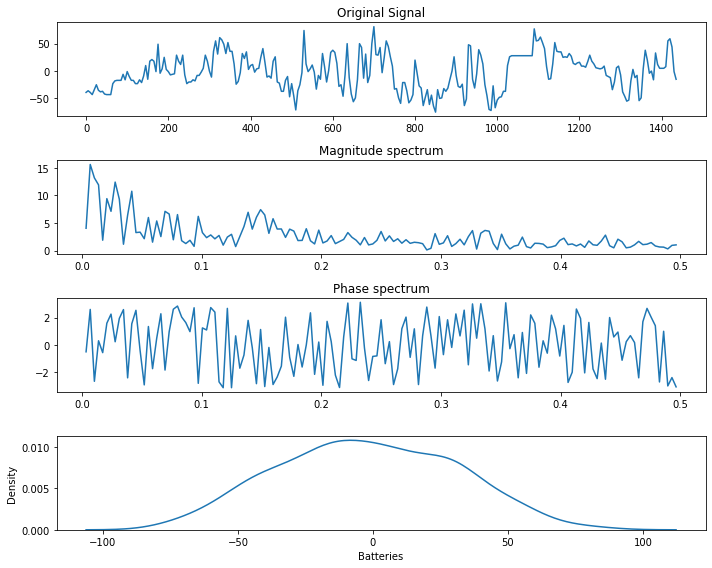

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190206.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**7 Feb 2019**

 02/07/2019  Time(in s) Batteries
0                     0       -29
1                     5       -25
2                    10       -24
3                    15       -50
4                    20       -73
 02/07/2019
Time(in s)    0
Batteries     0
dtype: int64


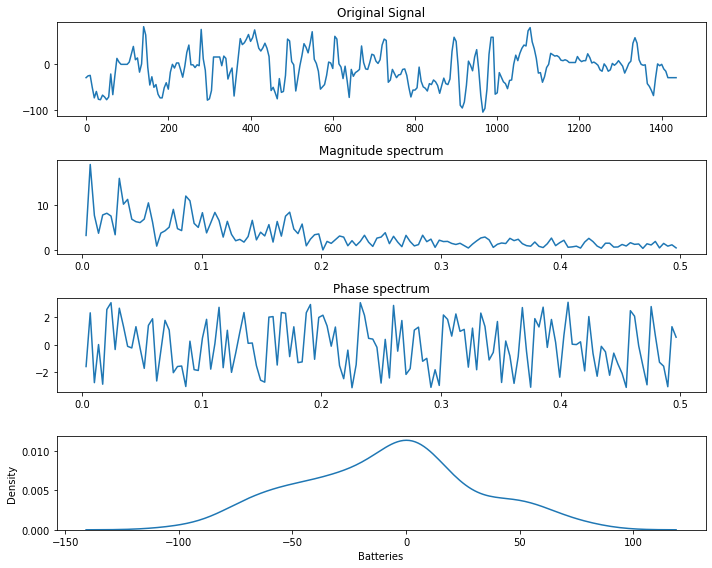

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190207.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**8 Feb 2019**

 02/08/2019  Time(in s) Batteries
0                     0       -27
1                     5        26
2                    10       -12
3                    15       -42
4                    20       -20
 02/08/2019
Time(in s)    0
Batteries     0
dtype: int64


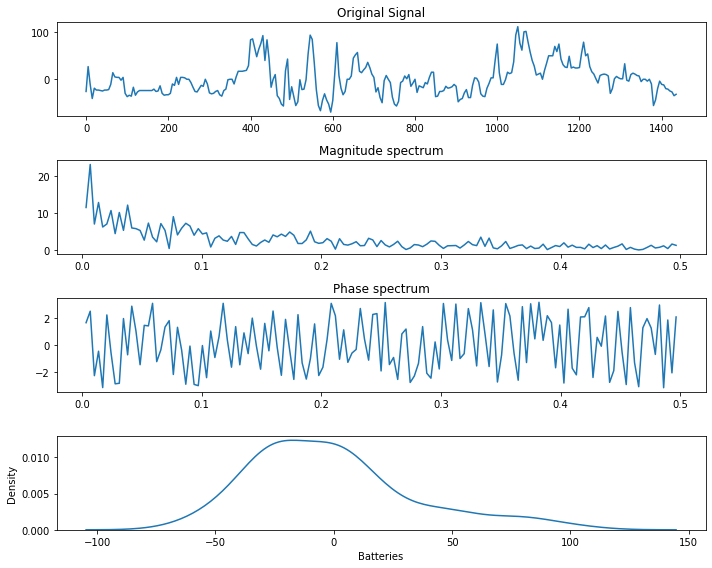

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190208.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**9 Feb 2019**

 02/09/2019  Time(in s) Batteries
0                     0       -30
1                     5       -20
2                    10        -4
3                    15        -1
4                    20        -5
 02/09/2019
Time(in s)    0
Batteries     0
dtype: int64


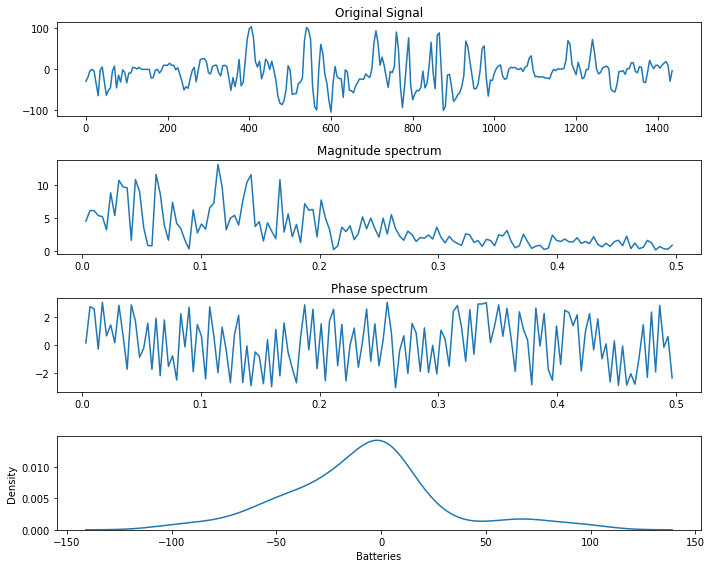

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190209.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**10 Feb 2019**

 02/10/2019  Time(in s) Batteries
0                     0         5
1                     5        36
2                    10        99
3                    15        96
4                    20        46
 02/10/2019
Time(in s)    0
Batteries     0
dtype: int64


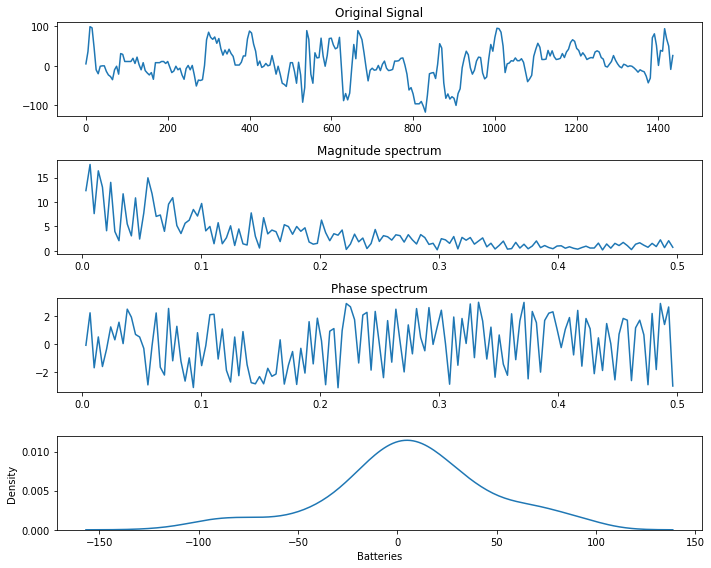

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190210.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**11 Feb 2019**

 02/11/2019  Time(in s) Batteries
0                     0         2
1                     5        13
2                    10       -49
3                    15       -59
4                    20       -57
 02/11/2019
Time(in s)    0
Batteries     0
dtype: int64


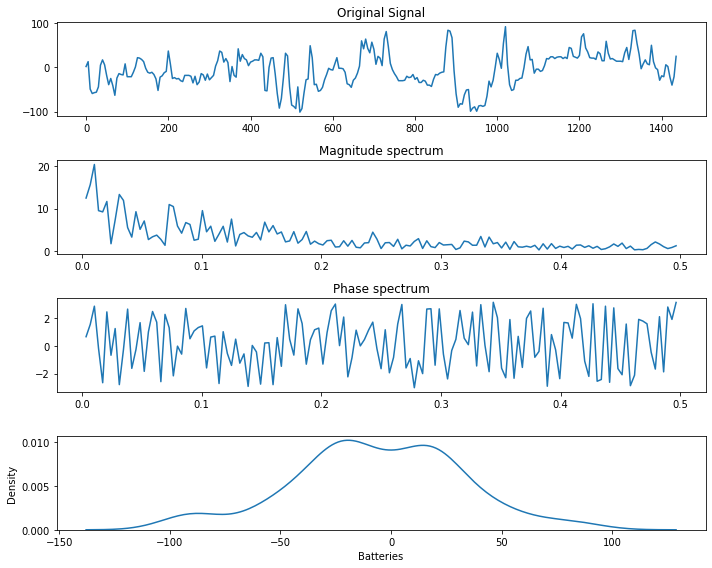

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190211.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**12 Feb 2019**

 02/12/2019  Time(in s) Batteries
0                     0        35
1                     5        92
2                    10        22
3                    15        11
4                    20        11
 02/12/2019
Time(in s)    0
Batteries     0
dtype: int64


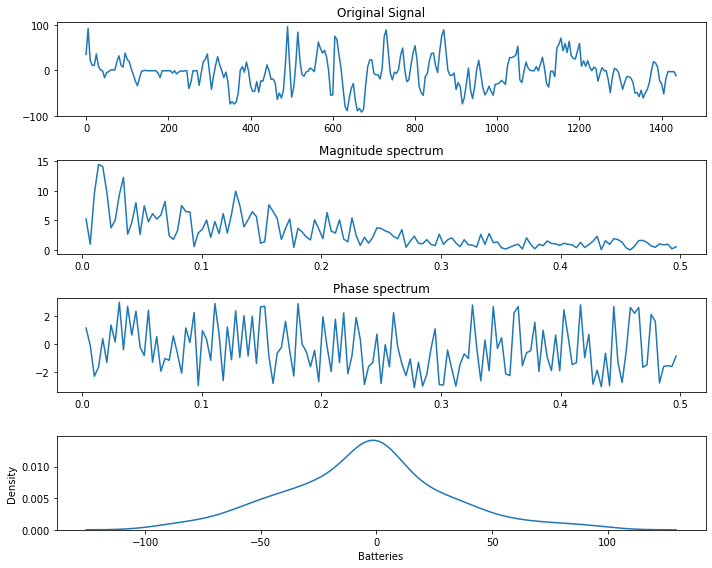

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190212.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**13 Feb 2019**

 02/13/2019  Time(in s) Batteries
0                     0         5
1                     5        29
2                    10        58
3                    15        51
4                    20        15
 02/13/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


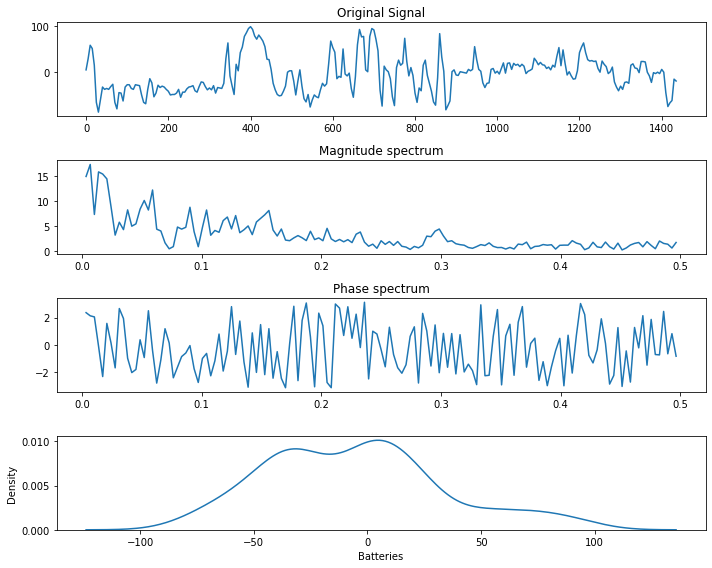

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190213.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**14 Feb 2019**

 02/14/2019  Time(in s) Batteries
281                1405       -30
282                1410       -46
283                1415       -48
284                1420       -48
285                1425       -48
 02/14/2019
Time(in s)    0
Batteries     0
dtype: int64
(286, 2)


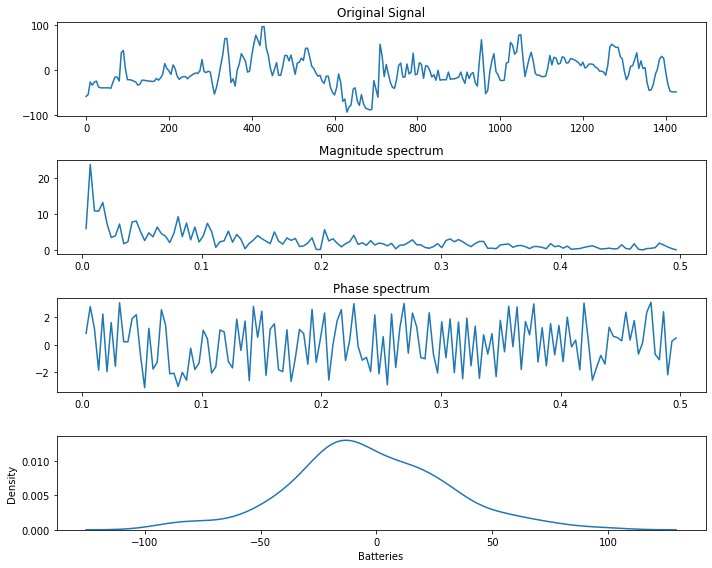

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190214.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.tail())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=286
Lx=1425
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**15 Feb 2019**

 02/15/2019  Time(in s) Batteries
0                     0       -37
1                     5         2
2                    10       -24
3                    15       -36
4                    20         4
 02/15/2019
Time(in s)    0
Batteries     0
dtype: int64


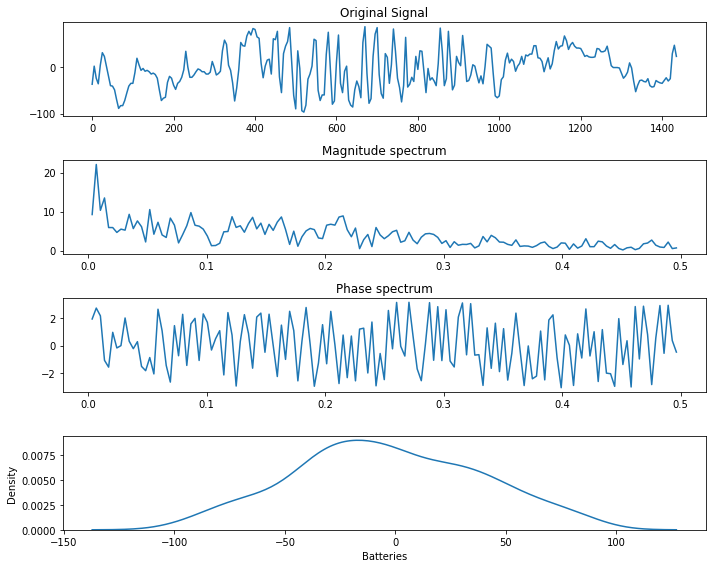

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190215.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 

**16 Feb 2019**

 02/16/2019  Time(in s) Batteries
0                     0        -7
1                     5        49
2                    10        52
3                    15         0
4                    20       -39
 02/16/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


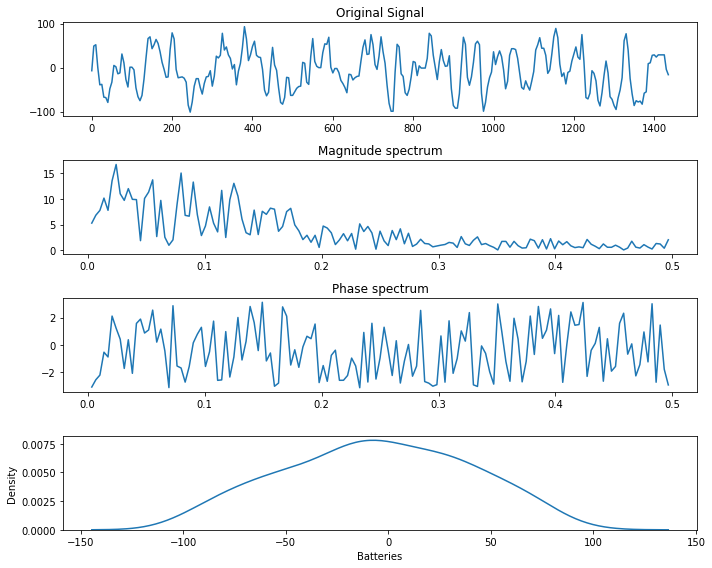

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190216.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**17 Feb 2019**

 02/17/2019  Time(in s) Batteries
0                     0        27
1                     5        86
2                    10        99
3                    15        88
4                    20       -15
 02/17/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


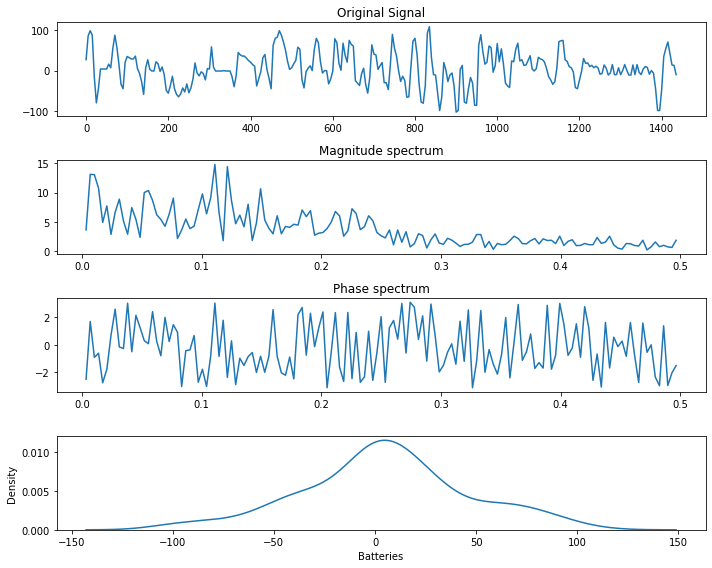

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190217.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**18 Feb 2019**

 02/18/2019  Time(in s) Batteries
0                     0       -12
1                     5        12
2                    10        -6
3                    15        -9
4                    20       -29
 02/18/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


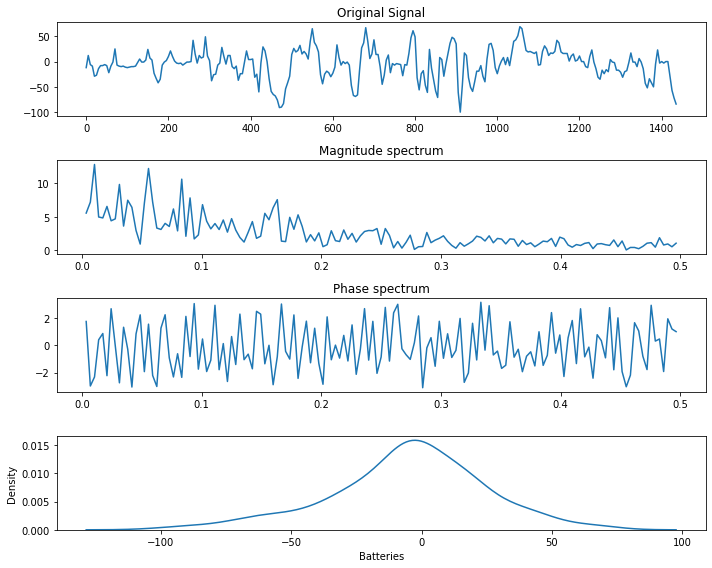

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190218.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**19 Feb 2019**

 02/19/2019  Time(in s) Batteries
0                     0       -66
1                     5        26
2                    10        33
3                    15        -1
4                    20         0
 02/19/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


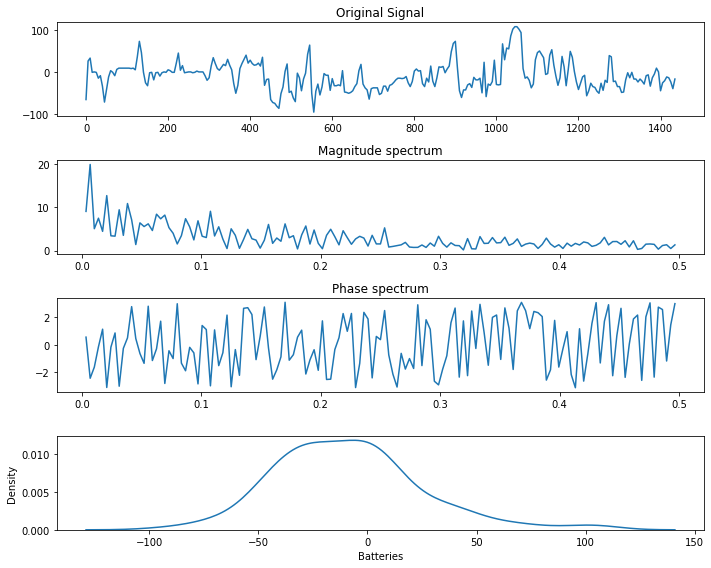

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190219.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**20 Feb 2019**

 02/20/2019  Time(in s) Batteries
0                     0       -44
1                     5        -1
2                    10        51
3                    15        43
4                    20        45
 02/20/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


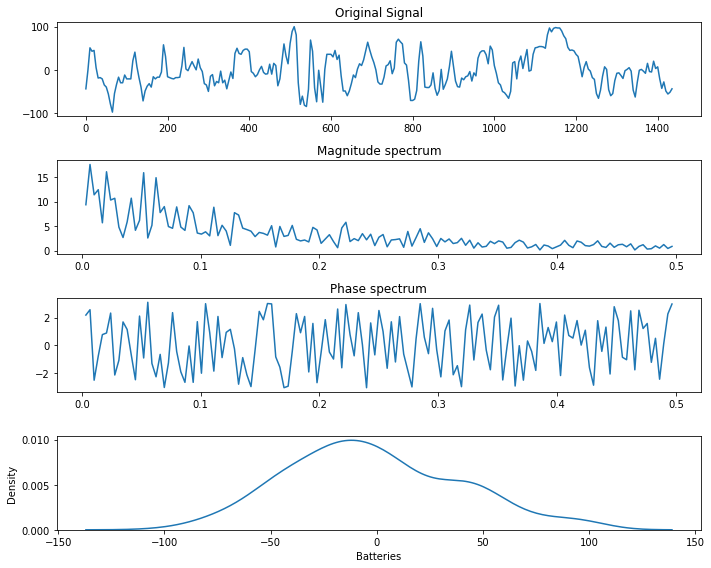

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190220.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**21 Feb 2019**

 02/21/2019  Time(in s) Batteries
0                     0       -31
1                     5        25
2                    10        58
3                    15        58
4                    20        43
 02/21/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


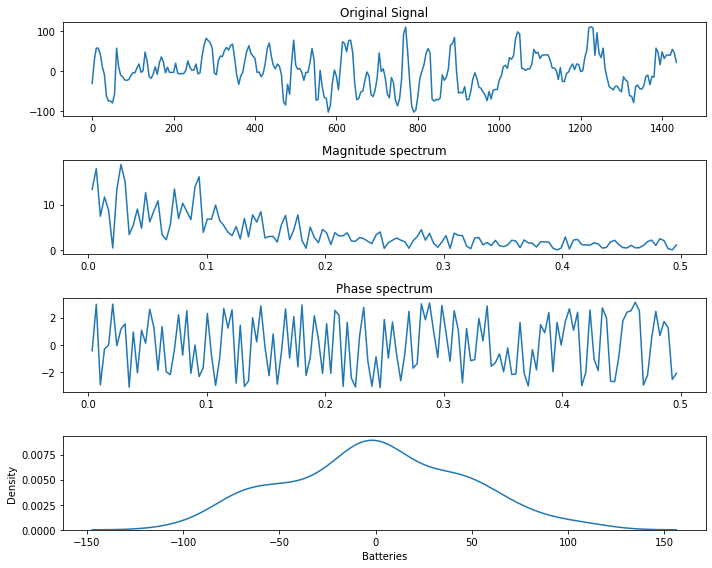

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190221.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**22 Feb 2019**

 02/22/2019  Time(in s) Batteries
0                     0        20
1                     5        51
2                    10        82
3                    15        49
4                    20        52
 02/22/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


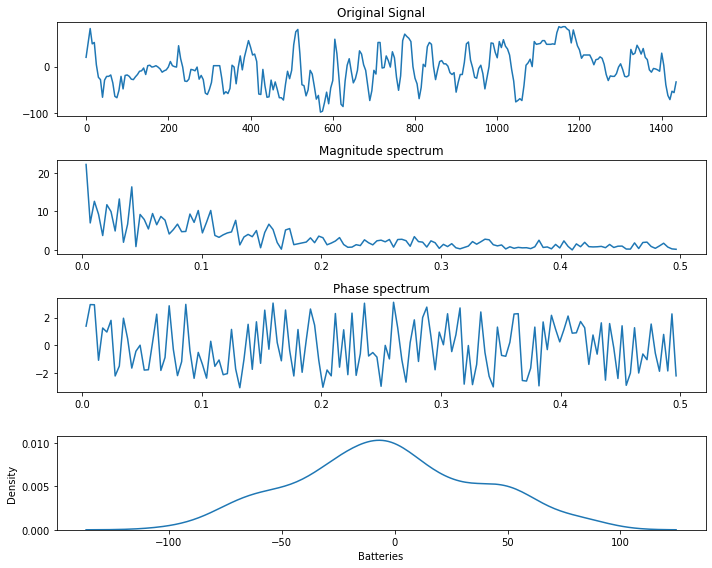

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190222.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**23 Feb 2019**

 02/23/2019  Time(in s) Batteries
0                     0         1
1                     5        87
2                    10         0
3                    15        -7
4                    20        -2
 02/23/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


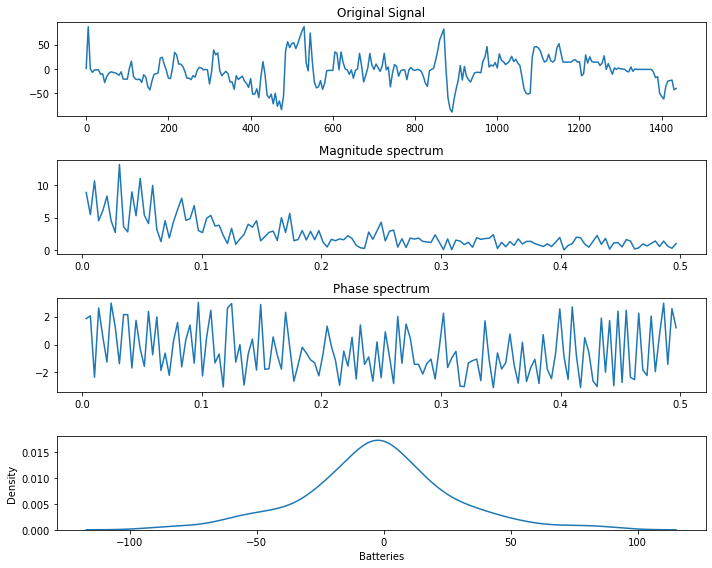

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190223.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**24 Feb 2019**

 02/24/2019  Time(in s) Batteries
0                     0        -7
1                     5        49
2                    10         3
3                    15       -40
4                    20       -72
 02/24/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


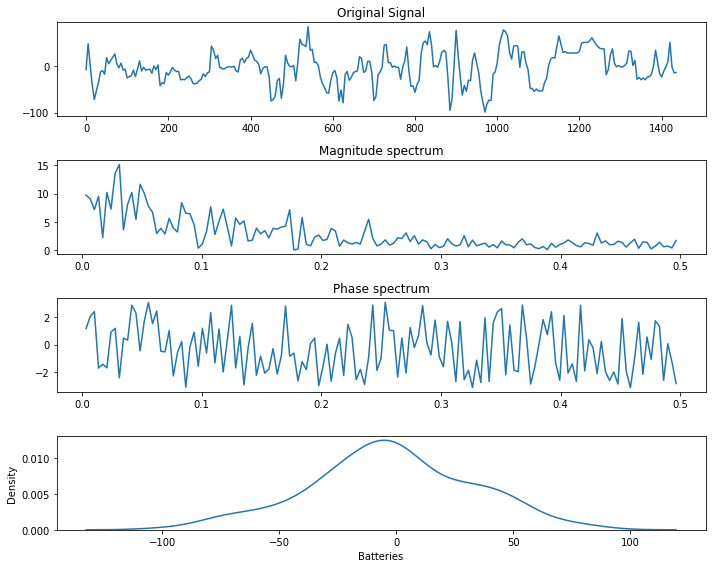

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190224.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**25 Feb 2019**

 02/25/2019  Time(in s) Batteries
0                     0        22
1                     5        37
2                    10         7
3                    15       -23
4                    20       -30
 02/25/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


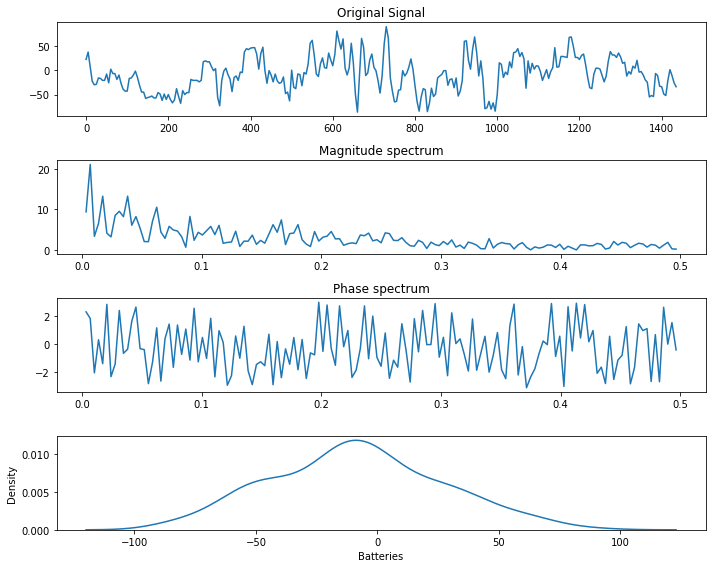

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190225.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**26 Feb 2019**

 02/26/2019  Time(in s) Batteries
0                     0         0
1                     5        76
2                    10        23
3                    15       -25
4                    20       -60
 02/26/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


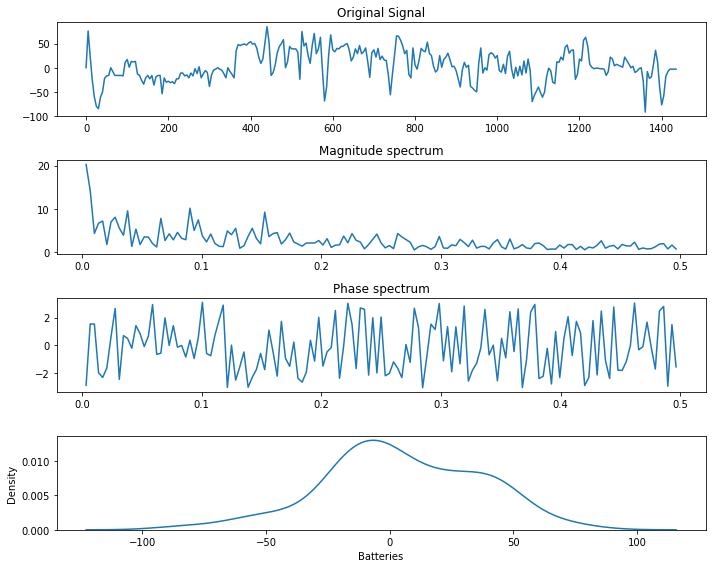

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190226.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**27 Feb 2019**

 02/27/2019  Time(in s) Batteries
0                     0        -9
1                     5         5
2                    10        -7
3                    15       -21
4                    20       -23
 02/27/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


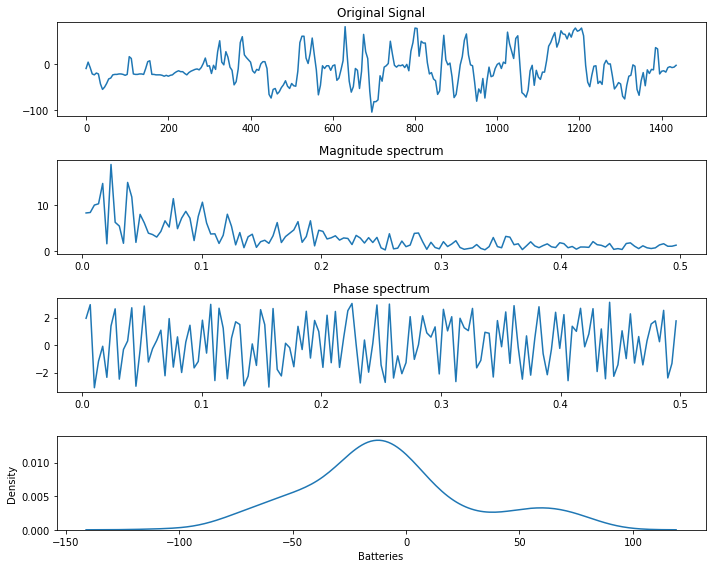

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190227.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)

**28 Feb 2019**

 02/28/2019  Time(in s) Batteries
0                     0        15
1                     5        26
2                    10        43
3                    15        11
4                    20        -1
 02/28/2019
Time(in s)    0
Batteries     0
dtype: int64
(288, 2)


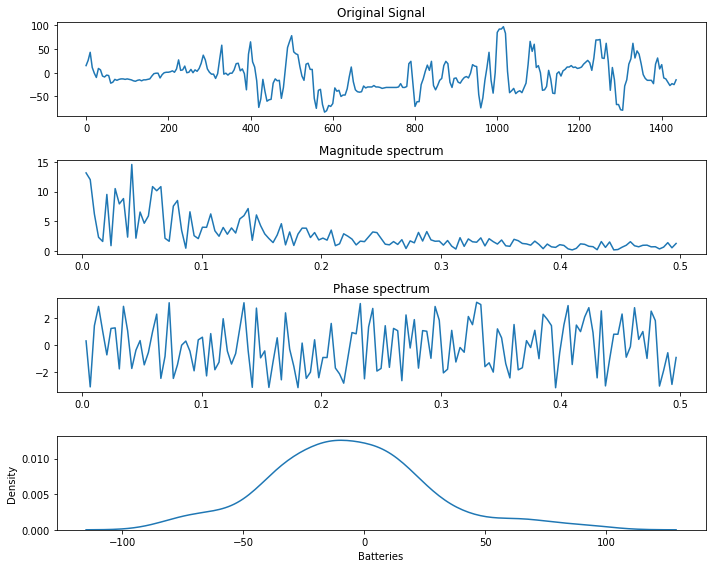

In [ ]:
#Data preprocessing
battery_data=pd.read_csv('/content/CAISO-batteries-20190228.csv')
battery_data=battery_data.transpose()
headers=battery_data.iloc[0]
df1=pd.DataFrame(battery_data.values[1:],columns=headers)
time=[]
for i in range(0,1437,5):
    time.append(i)                 #making up an array of time axis and inserting values using append
df1["Time(in s)"]=pd.DataFrame(time)
df1=df1[["Time(in s)","Batteries"]]
print(df1.head())
print(df1.isnull().sum())
from numpy.fft import fft,fftfreq
n=288
Lx=1435
xx=np.linspace(0,Lx,n)
x=df1["Batteries"] 
fft1= np.fft.fft(x)   #Raw fft values
fftabs=2*(np.abs(fft1/n)) #Processed absolute fft values
fftang=np.angle(fft1) 
freq=fftfreq(n)
mask=freq>0
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(xx,x)
ax[0].set_title('Original Signal')
ax[1].plot(freq[mask],(fftabs[mask]))
ax[1].set_title('Magnitude spectrum')
ax[2].plot(freq[mask],(fftang[mask]))
ax[2].set_title('Phase spectrum')
sns.kdeplot(df1['Batteries'].astype(float),ax=ax[3]) #Time domain kde plot
#sns.kdeplot(fftabs,ax=ax[4]) #Magnitude spectrum kde plot
plt.tight_layout() #Plot titles and axes titles do not overlap. 
print(df1.shape)